In [1]:
%run tools.ipynb

In [2]:
# some inputs
input_dir = '/geos/u73/msadiq/co2_data/obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12_'
#input_dir = '/geos/u73/msadiq/co2_data/obspack_co2_1_NRT_v5.2_2020-06-03_'
# output directory, output format: year + daily + site_code + '.nc'
output_directory = '/geos/u73/msadiq/co2_data/extract/'

filename = 'co2_gat_surface-insitu_442_allvalid-30magl'
#filename = 'co2_inx01_surface-insitu_60_allhours'
year = 2018
# site_code = 'abt' # not in use now


In [3]:
first_day = str(year) + '-01-01'
last_day = str(year+1) + '-01-01'

In [4]:
# open files
# open txt file for getting daily averages
# open nc file to get attributes

In [5]:
# 1, nc file
directory = input_dir + 'nc/data/nc/'
ds = xr.open_dataset(directory + filename + '.nc')
ds['time'] #['altitude']#.attrs['provider_comment']

<xarray.DataArray 'time' (obs: 21317)>
array(['2016-05-10T07:00:00.000000000', '2016-05-10T08:00:00.000000000',
       '2016-05-10T09:00:00.000000000', ..., '2018-12-31T21:00:00.000000000',
       '2018-12-31T22:00:00.000000000', '2018-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Dimensions without coordinates: obs
Attributes:
    long_name:  sample_time_in_seconds_since_january_1_1970
    comment:    POSIX time.  Number of seconds since January 1, 1970 in UTC. ...

In [6]:
# 2, txt file
directory = input_dir + 'txt/data/txt/'
#directory = '/geos/u73/msadiq/co2_data/obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12_txt/data/txt/'
txt_read = open(directory+filename+'.txt')
lines = txt_read.readlines()
line1 = lines[0].strip() # read the first line, and get header number
header_nm = int(line1[-3:])
data = pd.read_csv(directory + filename + '.txt', sep=' ', header =  header_nm -1)
data

,year,month,day,hour,minute,second,time,time_decimal,value,value_std_dev,...,latitude,longitude,altitude,elevation,intake_height,qcflag,obs_flag,obs_num,obspack_num,obspack_id
0,2016,5,10,7,0,0,1462863600,2016.355988,0.000406,6.290000e-07,...,53.0657,11.4429,100.0,70.0,30.0,O,0,1,22211145,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
1,2016,5,10,8,0,0,1462867200,2016.356102,0.000403,4.740000e-07,...,53.0657,11.4429,100.0,70.0,30.0,O,0,2,22211146,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
2,2016,5,10,9,0,0,1462870800,2016.356216,0.000402,4.620000e-07,...,53.0657,11.4429,100.0,70.0,30.0,O,0,3,22211147,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
3,2016,5,10,10,0,0,1462874400,2016.356330,0.000402,1.700000e-07,...,53.0657,11.4429,100.0,70.0,30.0,O,0,4,22211148,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
4,2016,5,10,11,0,0,1462878000,2016.356444,0.000402,2.830000e-07,...,53.0657,11.4429,100.0,70.0,30.0,O,0,5,22211149,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21312,2018,12,31,19,0,0,1546282800,2018.999429,0.000420,3.530000e-07,...,53.0657,11.4429,100.0,70.0,30.0,O,0,21313,22232457,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
21313,2018,12,31,20,0,0,1546286400,2018.999543,0.000419,1.002000e-06,...,53.0657,11.4429,100.0,70.0,30.0,O,0,21314,22232458,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
21314,2018,12,31,21,0,0,1546290000,2018.999658,0.000417,1.256000e-06,...,53.0657,11.4429,100.0,70.0,30.0,O,0,21315,22232459,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
21315,2018,12,31,22,0,0,1546293600,2018.999772,0.000417,5.980000e-07,...,53.0657,11.4429,100.0,70.0,30.0,O,0,21316,22232460,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...


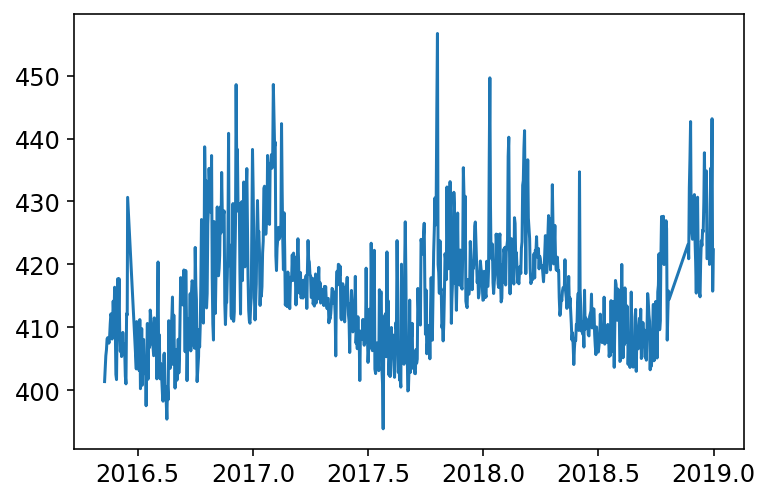

In [7]:
daily_mean = data.groupby(['year','month','day']).mean()
plt.plot(daily_mean['time_decimal'], daily_mean['value']*1e6)

In [8]:
data_year = data[data.year == year]
len(data_year)

7868

In [9]:
daily_mean = data_year.groupby(['month','day']).mean()
type(daily_mean)

pandas.core.frame.DataFrame

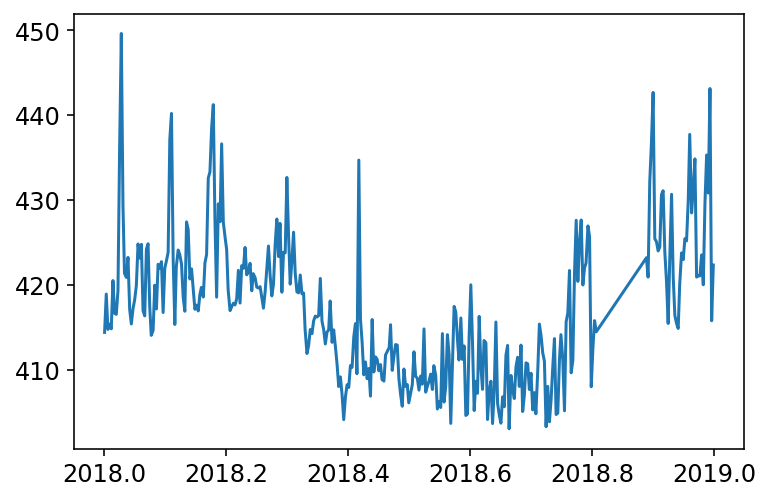

In [10]:
plt.plot(daily_mean['time_decimal'], daily_mean['value']*1e6)

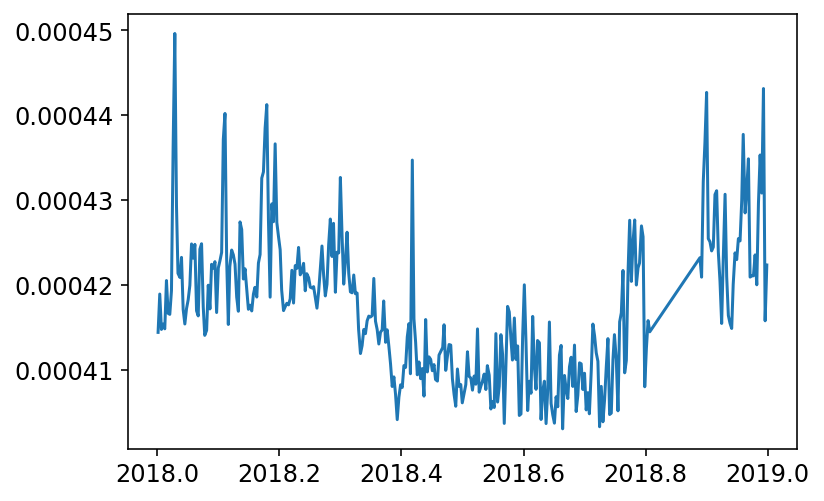

In [11]:
# remove that extreme value
s = daily_mean['value']
daily_mean['value'] = s.where(s < 0.00046, float('nan'))
plt.plot(daily_mean['time_decimal'], daily_mean['value'])

In [12]:
daily_mean.reset_index(inplace = True)

In [13]:
date = np.arange(first_day, last_day, dtype='datetime64[D]')
daily = xr.DataArray(float('nan'), coords=[date], dims=['date']) 
#daily.loc['2018-03-01'] = 1.
#daily

In [14]:
for iloc in range(len(daily_mean)):
    imonth = int(daily_mean.iloc[iloc].month)
    if(imonth < 10): imonth = '0' + str(imonth)
    iday = int(daily_mean.iloc[iloc].day)
    if(iday < 10): iday = '0' + str(iday)
    date = str(year) + '-' + str(imonth) + '-' + str(iday)

    daily.loc[date] = daily_mean.iloc[iloc].value*1e6 # convert unit to ppmv

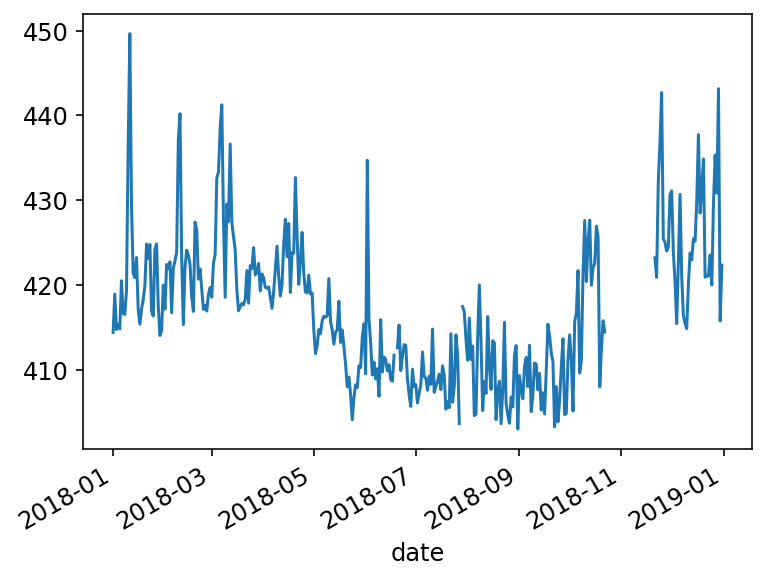

In [15]:
daily.plot()

In [16]:
ds_daily = daily.to_dataset(name = 'co2')
ds_daily

<xarray.Dataset>
Dimensions:  (date: 365)
Coordinates:
  * date     (date) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
Data variables:
    co2      (date) float64 414.4 418.9 414.7 415.4 ... 430.8 443.1 415.8 422.3

In [17]:
#attributes = ['site_code', 'site_name', 'site_latitude', 'site_longitude', 
#              'dataset_project', 'site_elevation', 'site_elevation_unit', 
#              'dataset_intake_ht', 'dataset_intake_ht_unit']

#for iattr in attributes:
#    ds.attrs[iattr]
#    ds_daily.attrs[iattr] = ds.attrs[iattr]
ds_daily.attrs = ds.attrs # copy the whole attributes from original dataset
ds_daily.attrs['units'] = 'ppmv'
ds_daily

<xarray.Dataset>
Dimensions:  (date: 365)
Coordinates:
  * date     (date) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
Data variables:
    co2      (date) float64 414.4 418.9 414.7 415.4 ... 430.8 443.1 415.8 422.3
Attributes:
    site_code:                                    GAT
    site_name:                                    Gartow
    site_country:                                 Germany
    site_country_flag:                            GERM0001.GIF
    site_latitude:                                53.0657
    site_longitude:                               11.4429
    site_elevation:                               70.0
    site_elevation_unit:                          masl
    site_position_comment:                        This is the nominal locatio...
    site_utc2lst:                                 -2.0
    site_utc2lst_comment:                         Add 'site_utc2lst' hours to...
    dataset_creation_date:                        2019-08-12T14:42:42.253127
    dataset_num:                                  416
    dataset_name:                                 co2_gat_surface-insitu_442_...
    dataset_globalview_prefix:                    gat_442C0
    dataset_process:                              PassThru
    dataset_alternative_names:                    co2_gat_surface-insitu_425_...
    dataset_alternative_names_description:        The attribute dataset_alter...
    dataset_alternative_names_comment:            This dataset record changed...
    dataset_parameter:                            co2
    dataset_project:                              surface-insitu
    dataset_platform:                             fixed
    dataset_map:                                  map_gat_surface-insitu_442.png
    dataset_selection:                            all valid hours from 30 mag...
    dataset_selection_tag:                        allvalid-30magl
    dataset_comment:                              Please note that some datas...
    dataset_calibration_scale:                    WMO CO2 X2007
    dataset_start_date:                           2016-05-10T07:00:00Z
    dataset_stop_date:                            2018-12-31T23:00:00Z
    dataset_data_frequency:                       1
    dataset_data_frequency_unit:                  hour
    dataset_time_window_lst:                      12-16
    dataset_time_window_utc:                      14.0-18.0
    dataset_time_window_exclusion:                F
    dataset_intake_ht:                            30.0
    dataset_intake_ht_unit:                       magl
    dataset_description:                          This data package is intend...
    dataset_provider_citation_1:                  ICOS RI: ICOS Atmospheric G...
    dataset_identifier_1:                         https://hdl.handle.net/10.1...
    dataset_provider_citation_2:                  ICOS RI, 2019. ICOS ATC CO2...
    dataset_identifier_2:                         https://hdl.handle.net/1167...
    dataset_provider_citation_total:              2
    dataset_provider_license:                     DATA POLICY: ICOS DATA is l...
    dataset_reference_total_listed:               0
    dataset_contribution:                         These data are provided by ...
    lab_total_listed:                             2
    lab_1_number:                                 442
    lab_1_abbr:                                   ICOS-ATC
    lab_1_name:                                   ICOS ATMOSPHERE THEMATIC CE...
    lab_1_address1:                               LSCE-Orme point courrier 129
    lab_1_address2:                               CEA-Orme des Merisiers, 
    lab_1_address3:                               F-91191 GIF-SUR-YVETTE CEDEX
    lab_1_country:                                France
    lab_1_url:                                    https://icos-atc.lsce.ipsl.fr
    lab_1_parameter:                              Lab has contributed measure...
    lab_1_ongoing_atmospheric_air_comparison:     T
    lab_2_number:    

In [18]:
psurf = 101325
R = 8.314
g = 9.8
M = 0.029
h = ds_daily.attrs['site_elevation']
T = 288
pressure_site = psurf*np.exp(-1*g*M*h/(R*T))
pressure_site/psurf
#ds_daily

0.9917259774629368

In [19]:
ds_daily.to_netcdf(output_directory + str(year) + '_daily_' + ds_daily.attrs['site_code'] + '.nc')